#                               
#                                STROKE PREDICTION                    


##### Import necessery libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("healthcare-dataset-stroke-data.csv")

data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
5,121,Female,38.0,0,0,Yes,Private,Urban,91.44,NaN,Unknown,0
6,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
7,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
8,156,Female,33.0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,0
9,163,Female,20.0,0,0,No,Private,Rural,94.67,28.8,Unknown,0


# Data mining and Data preprocessing

In [2]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
#independent parameters
x=data.iloc[:,1:11]
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked
1,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown
2,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked
3,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked
4,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown


In [26]:
#dependent parameter
y=data.iloc[:,11]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [27]:
#Numerical_features
NF=x[["age","bmi","avg_glucose_level"]]
#Cetogorical_features
CF=x[["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]]

In [28]:
#object to int datatype
from sklearn.preprocessing import LabelEncoder
x_labelencoder=LabelEncoder()
x.iloc[:,0]=x_labelencoder.fit_transform(x.iloc[:,0])
x.iloc[:,4]=x_labelencoder.fit_transform(x.iloc[:,4])
x.iloc[:,5]=x_labelencoder.fit_transform(x.iloc[:,5])
x.iloc[:,6]=x_labelencoder.fit_transform(x.iloc[:,6])
x.iloc[:,9]=x_labelencoder.fit_transform(x.iloc[:,9])
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,17.0,0,0,0,2,1,92.97,NaN,1
1,0,13.0,0,0,0,4,0,85.81,18.6,0
2,1,55.0,0,0,1,2,1,89.17,31.5,2
3,0,42.0,0,0,0,2,1,98.53,18.5,2
4,0,31.0,0,0,0,2,1,108.89,52.3,0


In [29]:
#dealing with null values
from sklearn.impute import SimpleImputer
missingvalueImputer = SimpleImputer(missing_values=np.nan, strategy ="mean")
missingvalueImputer = missingvalueImputer.fit(x)

x.iloc[:,:]=missingvalueImputer.transform(x.iloc[:,:])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
dtypes: float64(10)
memory usage: 399.3 KB


In [30]:
#dividing dataset into train and test data
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.025,random_state=0)

# Model creating and evaluation

In [10]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
decision_tree.fit(x_train,y_train)
predictValues=decision_tree.predict(x_test)


predictValues


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
input=[[0,56,1,1,1,2,1,9,54,0]]
decision_tree.predict(input)

D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(predictValues, y_test))

0.984375


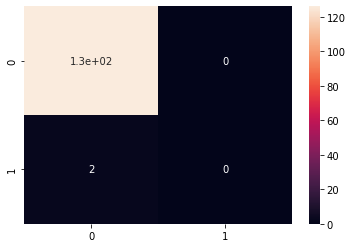

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, predictValues)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [36]:
data_features_names=x.columns
!pip install graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

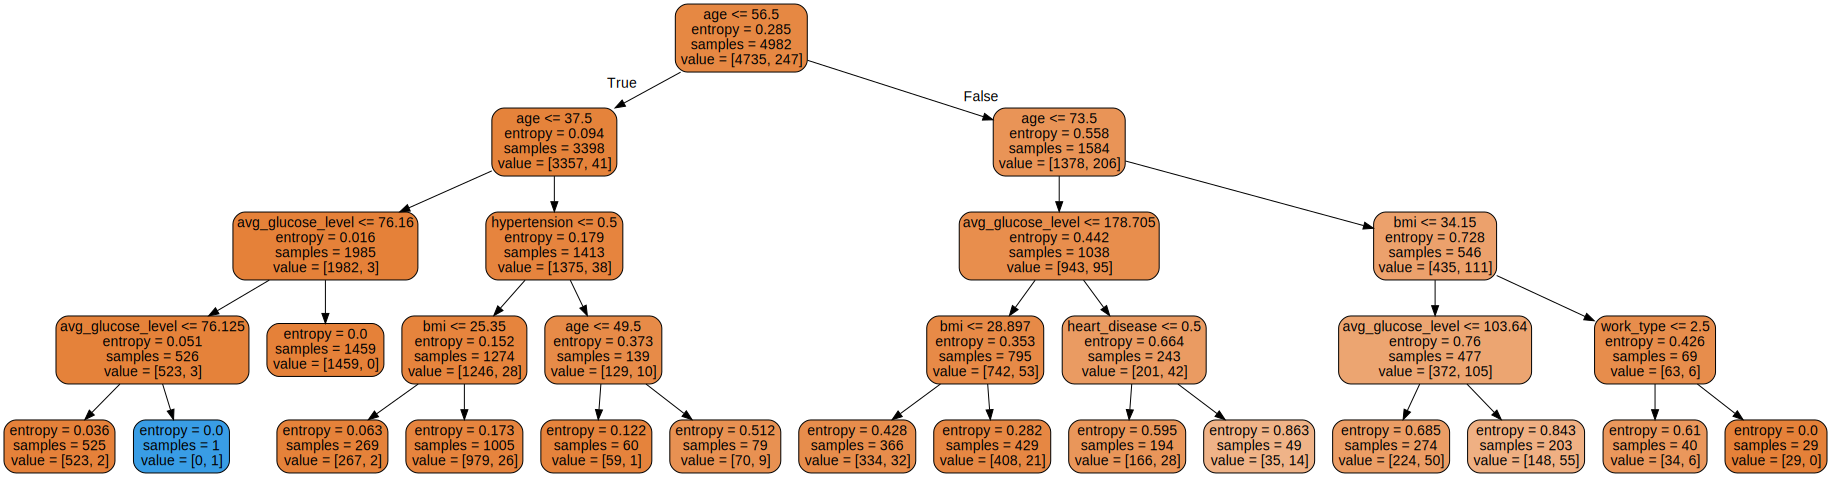

In [37]:
graph=Source(tree.export_graphviz(decision_tree,feature_names = x.columns,filled=True,rounded=True))
display(SVG(graph.pipe(format='svg')))

d=2.4
c=0.8

In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFClassifier= RandomForestClassifier(n_estimators=3,random_state=22, criterion="entropy",max_depth=3)

RFClassifier.fit(x_train,y_train)

y_pred=RFClassifier.predict(x_test)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
input=[[0,56,1,1,1,2,1,9,54,0]]
RFClassifier.predict(input)

D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.984375


# Data Visualization

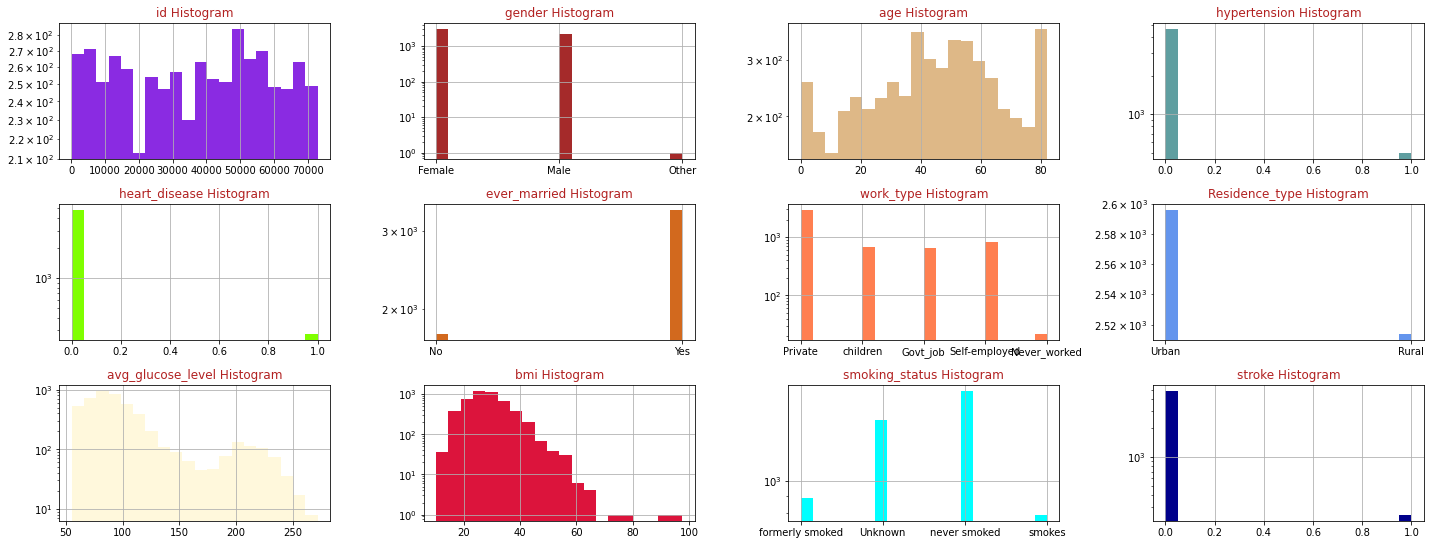

In [17]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms1.png')
    plt.show()
draw_histograms(data,data.columns,8,4)

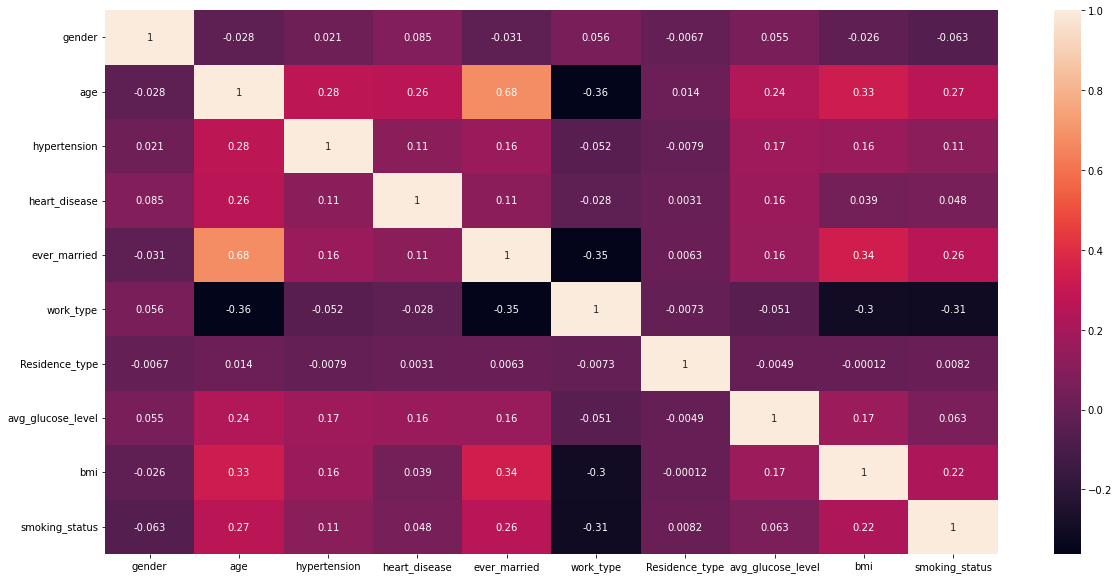

In [18]:
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(x.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [19]:
ageno=data.loc[data['stroke']==0,"age"]
print(len(ageno))
ageyes=data.loc[data['stroke']==1,"age"]
print(len(ageyes))

4861
249


In [20]:
bmiyes=data.loc[data['stroke']==1,"bmi"]                                          #bmi with stroke
bmino=data.loc[data['stroke']==0,"bmi"]                                           #bmi without stroke
gluyes=data.loc[data['stroke']==1,"avg_glucose_level"]                            #glucose level with stroke
gluno=data.loc[data['stroke']==0,"avg_glucose_level"]                             #glucose level without stroke
maleyes=data.loc[(data['stroke']==1)&(x["gender"]==1)]                            #male with stroke
maleno=data.loc[(data['stroke']==0)&(x["gender"]==1)]                             #male without stroke
femaleyes=data.loc[(data['stroke']==1)&(x["gender"]==0)]                          #female with stroke
femaleno=data.loc[(data['stroke']==0)&(x["gender"]==0)]                           #female without stroke
marriedyes=data.loc[(data['stroke']==1)&(x["ever_married"]==1)]                   #married with stroke
marriedno=data.loc[(data['stroke']==0)&(x["ever_married"]==1)]                    #married without stroke
unmarriedyes=data.loc[(data['stroke']==1)&(x["ever_married"]==0)]                 #unmarried with stroke
unmarriedno=data.loc[(data['stroke']==0)&(x["ever_married"]==0)]                  #unmarried without stroke
ruralyes=data.loc[(data['stroke']==1)&(x["Residence_type"]==0)]                   #rural with stroke
ruralno=data.loc[(data['stroke']==0)&(x["Residence_type"]==0)]                    #rural without stroke
urbanyes=data.loc[(data['stroke']==1)&(x["Residence_type"]==1)]                   #urban with stroke
urbanno=data.loc[(data['stroke']==0)&(x["Residence_type"]==1)]                    #urban without stroke


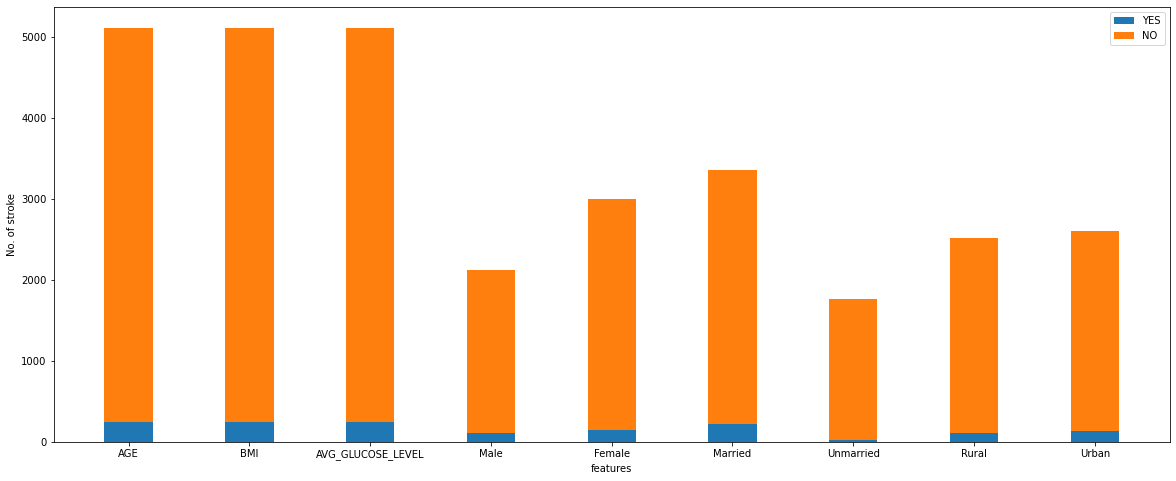

In [21]:
from matplotlib.pyplot import figure
x=["AGE","BMI","AVG_GLUCOSE_LEVEL","Male","Female","Married","Unmarried","Rural","Urban"]
yess=[len(ageyes),len(bmiyes),len(gluyes),len(maleyes),len(femaleyes),len(marriedyes),len(unmarriedyes),len(ruralyes),len(urbanyes)]
noo=[len(ageno),len(bmino),len(gluno),len(maleno),len(femaleno),len(marriedno),len(unmarriedno),len(ruralno),len(urbanno)]

w=0.4
figure(figsize=(20,8))
plt.bar(x,yess,w,label="YES")
plt.bar(x,noo,w,bottom=yess,label="NO")
plt.xlabel('features')
plt.ylabel("No. of stroke")
plt.legend()
plt.savefig("features.jpg")

In [22]:
hy=data.loc[(data['stroke']==1)&(data["hypertension"]==1)]        #with hypertension
hn=data.loc[(data['stroke']==1)&(data["hypertension"]==0)]        #without hypertension

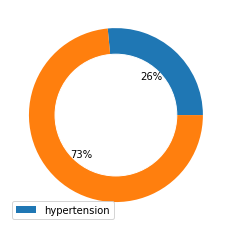

<Figure size 432x288 with 0 Axes>

In [23]:
dt=[len(hy),len(hn)]
label=["hypertension"]
plt.pie(dt,autopct="%2d%%")
plt.legend(label,loc="best")
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()
plt.savefig("piechart1.jpg")

In [31]:
# smoking data
unknown=data.loc[(data['stroke']==1)&(x["smoking_status"]==0)]           #unkown
smkform=data.loc[(data['stroke']==1)&(x["smoking_status"]==1)]       #formaly smokes
smkno=data.loc[(data['stroke']==1)&(x["smoking_status"]==2)]         #never smoked
smk3=data.loc[(data['stroke']==1)&(x["smoking_status"]==3)]          #smokes


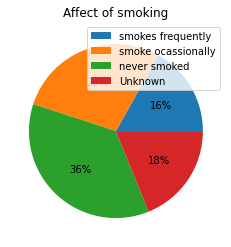

In [32]:
dt=[len(smk3),len(smkform),len(smkno),len(unknown)]
label=["smokes frequently","smoke ocassionally","never smoked","Unknown"]
plt.pie(dt,autopct="%2d%%")
plt.legend(label,loc='upper right')
plt.title("Affect of smoking")
plt.savefig("piechart2.png")

# Finalizing the Model and saving it

In [33]:
#final model
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=3,random_state=22, criterion="entropy",max_depth=3)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
model.score(x_test,y_test)

0.984375

In [35]:
#Saving the model
import pickle
with open('model_pickle.pk1','wb') as file:
    pickle.dump(model,file)

### Thank You & presented by:-

# Riya Dubey
# Rashmi Gourh
# Parmeet Kaur
# Mohd Rameez Ansari

## :-) We rest our case...
